In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Credit Card Transactions Fraud Detection
# Syntetic data

df = pd.read_csv("../data/raw/fraudTrain.csv")
df = df.drop('Unnamed: 0', axis=1)

df["trans_date_trans_time"] = pd.to_datetime(df["trans_date_trans_time"])

The ideas that we implement in this notebook come from [this Kaggle kernel](https://www.kaggle.com/code/kartik2112/credit-card-transactions-fraud-detection-eda/). For this project, we will pretend that these features were suggested by an expert.

The suggested new features are the following:

* Hour of the day
* Encode the hour of the day, if the transaction is between 21:00-05:00
* Frequency of the transactions in the last 1-7-30 days.

In [3]:
# Hour of the day

df["hour"] = df.trans_date_trans_time.dt.hour

In [4]:
# Normal hours are between 05:00 and 21:00 and abnormal otherwise
df["is_normal_hour"] = 0
df.loc[df.hour < 5, "is_normal_hour"] = 1
df.loc[df.hour > 21, "is_normal_hour"] = 1

In [5]:
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,hour,is_normal_hour
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,0,1
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,0,1
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,0,1
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,0,1
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,0,1


<AxesSubplot:>

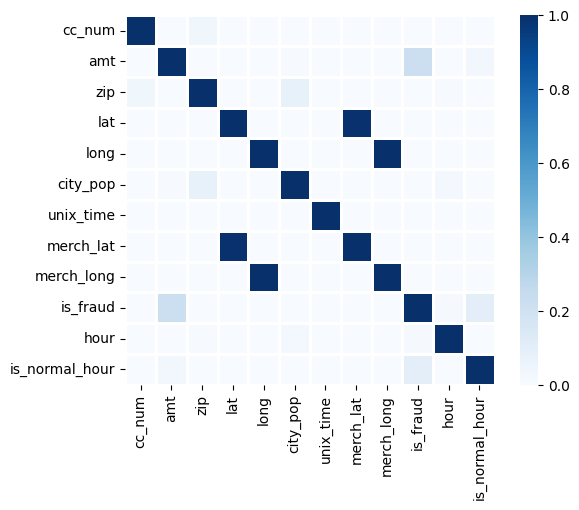

In [6]:
df_corr = df.corr()

sns.heatmap(df_corr, vmin=0, vmax=1, linewidths=2, square=True, cmap='Blues')

Other features that we can explore are the following:

* Average number of past transactions in a day
* Average number of past transactions in a week
* Average number of past transactions in a month